HANA TITANIA SASTRIAN
23083010056
ANALISIS DATA EKSPLORATIF A

In [1]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

file_name = 'ProductPriceIndex.csv'

df = pd.read_csv(file_name, delimiter=';')

price_columns = ['farmprice', 'atlantaretail', 'chicagoretail', 'losangelesretail', 'newyorkretail', 'averagespread']

for column in price_columns:
    if column != 'averagespread':
        df[column] = pd.to_numeric(df[column].replace('[\$,]', '', regex=True), errors='coerce')
    else:
        df[column] = pd.to_numeric(df[column].replace('[\%,]', '', regex=True), errors='coerce')

df['date'] = pd.to_datetime(df['date'], errors='coerce', dayfirst=True)

print(df.head())


Saving ProductPriceIndex.csv to ProductPriceIndex (2).csv
        productname       date  farmprice  atlantaretail  chicagoretail  \
0      Strawberries 2019-05-19       1.16           2.23           1.70   
1   Romaine Lettuce 2019-05-19       0.35           1.72           2.00   
2  Red Leaf Lettuce 2019-05-19       0.32           1.84           1.84   
3          Potatoes 2019-05-19       1.50           5.32           5.14   
4           Oranges 2019-05-19       0.41           1.42           1.45   

   losangelesretail  newyorkretail  averagespread  
0              1.99           2.54          82.33  
1              1.69           1.99         428.57  
2              1.69           1.89         467.19  
3              3.99           6.22         244.50  
4              1.34           2.05         281.71  


MISSING VALUE

In [12]:
df.isnull().sum()

,0
productname,0
date,0
farmprice,1
atlantaretail,1
chicagoretail,0
losangelesretail,0
newyorkretail,8
averagespread,0


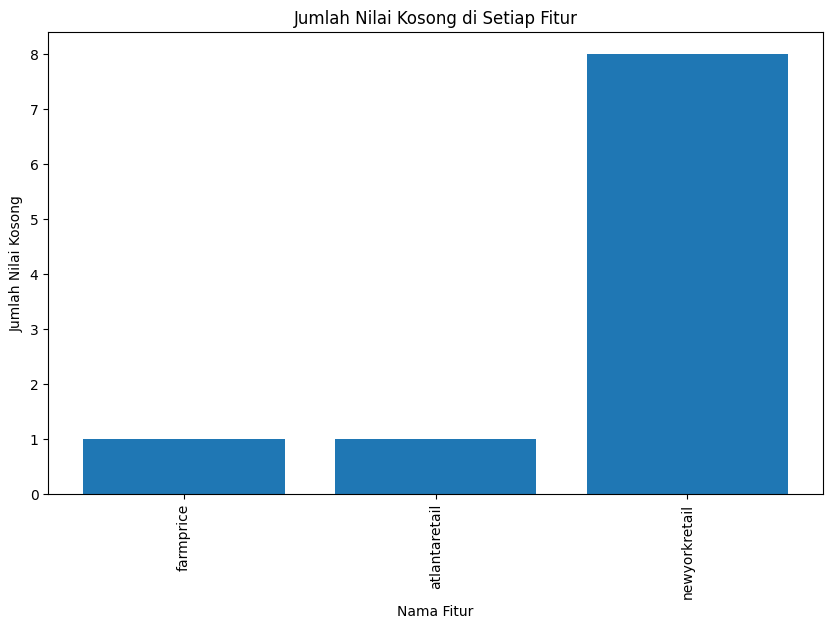

In [13]:
# Identifikasi kolom yang memiliki nilai kosong (missing values)
null_counts = df.isna().sum()
null_counts = null_counts[null_counts > 0]

# Visualisasi kolom dengan nilai kosong
plt.figure(figsize=(10, 6))
plt.bar(null_counts.index, null_counts)
plt.title('Jumlah Nilai Kosong di Setiap Fitur')
plt.xlabel('Nama Fitur')
plt.ylabel('Jumlah Nilai Kosong')
plt.xticks(rotation=90)
plt.show()


In [15]:
# Mengisi nilai kosong (missing value) dengan modus (nilai yang paling sering muncul) untuk kolom tertentu
columns_with_na = ['farmprice', 'atlantaretail', 'newyorkretail']

for col in columns_with_na:
    most_frequent = df[col].mode()[0]
    df[col].fillna(most_frequent, inplace=True)

In [16]:
df.isnull().sum()

,0
productname,0
date,0
farmprice,0
atlantaretail,0
chicagoretail,0
losangelesretail,0
newyorkretail,0
averagespread,0


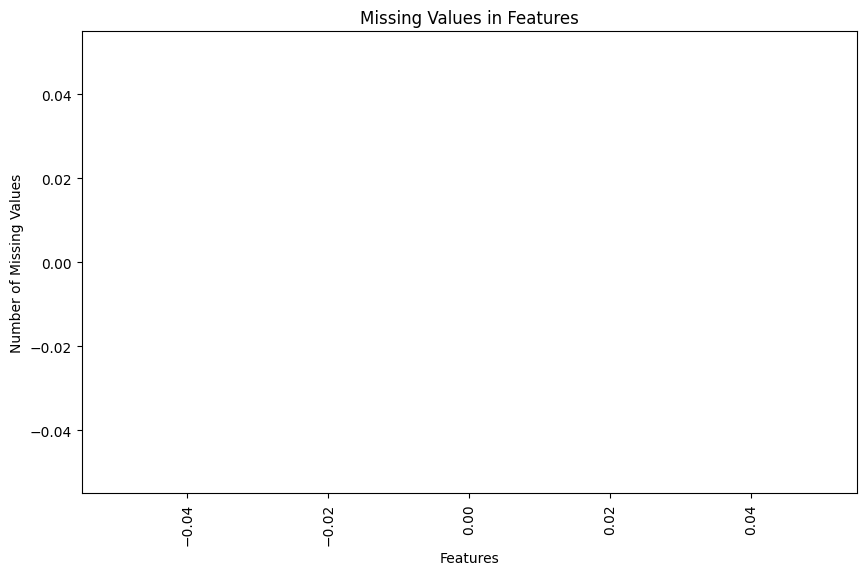

In [17]:
import matplotlib.pyplot as plt

# Menghitung jumlah nilai kosong (missing values) di setiap kolom
missing_values = df.isnull().sum()

# Memilih kolom yang memiliki nilai kosong saja
missing_values = missing_values[missing_values > 0]

# Membuat visualisasi menggunakan bar plot
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.title('Missing Values in Features')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=90)
plt.show()


DUMMY VARIABEL

In [18]:
# Menghitung jumlah nilai unik untuk setiap kolom dalam DataFrame
for feature in df.columns:
    unique_count = df[feature].nunique()
    print(f"Jumlah nilai unik di {feature}: {unique_count}")


Jumlah nilai unik di productname: 22
Jumlah nilai unik di date: 1019
Jumlah nilai unik di farmprice: 315
Jumlah nilai unik di atlantaretail: 527
Jumlah nilai unik di chicagoretail: 458
Jumlah nilai unik di losangelesretail: 436
Jumlah nilai unik di newyorkretail: 405
Jumlah nilai unik di averagespread: 10492


In [19]:
# Membuat variabel dummy untuk kolom harga
df_dummies = pd.get_dummies(df, columns=['farmprice', 'atlantaretail', 'newyorkretail'], prefix=['FarmPrice', 'AtlantaRetail', 'NewYorkRetail'])

# Menampilkan 5 baris pertama dari DataFrame yang sudah ditambahkan variabel dummy
df_dummies.head()


,productname,date,chicagoretail,losangelesretail,averagespread,FarmPrice_0.0,FarmPrice_0.04,FarmPrice_0.05,FarmPrice_0.06,FarmPrice_0.07,...,NewYorkRetail_6.24,NewYorkRetail_6.32,NewYorkRetail_6.47,NewYorkRetail_6.49,NewYorkRetail_6.74,NewYorkRetail_6.99,NewYorkRetail_7.99,NewYorkRetail_8.92,NewYorkRetail_11.74,NewYorkRetail_41.49
0,Strawberries,2019-05-19,1.70,1.99,82.33,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Romaine Lettuce,2019-05-19,2.00,1.69,428.57,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Red Leaf Lettuce,2019-05-19,1.84,1.69,467.19,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Potatoes,2019-05-19,5.14,3.99,244.50,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Oranges,2019-05-19,1.45,1.34,281.71,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
import pandas as pd

# Misalkan kita memiliki DataFrame df sebagai berikut
data = {
    'productname': ['Strawberries', 'Romaine Lettuce', 'Red Leaf Lettuce', 'Potatoes', 'Oranges'],
    'farmprice': ['$1.16', '$0.35', '$0.32', '$1.50', '$0.41'],
    'atlantaretail': ['$2.23', '$1.72', '$1.84', '$5.32', '$1.42'],
    'newyorkretail': ['$2.54', '$1.99', '$1.89', '$6.22', '$2.05']
}

# Membuat DataFrame
df = pd.DataFrame(data)

# Membuat variabel dummy untuk kolom harga
df_dummies = pd.get_dummies(df, columns=['farmprice', 'atlantaretail', 'newyorkretail'], prefix=['FarmPrice', 'AtlantaRetail', 'NewYorkRetail'])

# Menampilkan 5 baris pertama dari DataFrame yang sudah ditambahkan variabel dummy
print("DataFrame setelah dummy encoding:")
print(df_dummies.head())

# Mengganti nilai True/False menjadi 1/0 pada kolom yang sesuai
# Namun, dummy variables tidak memiliki True/False, jadi kita tidak perlu langkah ini di sini.

# Jika kita memiliki kolom boolean lain yang ingin diubah menjadi 1/0:
# Contoh (kolom boolean yang tidak ada dalam data):
# df_dummies['some_boolean_column'] = [True, False, True, False, True]

# Mengganti True menjadi 1 dan False menjadi 0
# df_dummies['some_boolean_column'] = df_dummies['some_boolean_column'].replace({True: 1, False: 0})

# Menampilkan DataFrame akhir
print("DataFrame setelah penggantian:")
print(df_dummies.head())


DataFrame setelah dummy encoding:
        productname  FarmPrice_$0.32  FarmPrice_$0.35  FarmPrice_$0.41  \
0      Strawberries            False            False            False   
1   Romaine Lettuce            False             True            False   
2  Red Leaf Lettuce             True            False            False   
3          Potatoes            False            False            False   
4           Oranges            False            False             True   

   FarmPrice_$1.16  FarmPrice_$1.50  AtlantaRetail_$1.42  AtlantaRetail_$1.72  \
0             True            False                False                False   
1            False            False                False                 True   
2            False            False                False                False   
3            False             True                False                False   
4            False            False                 True                False   

   AtlantaRetail_$1.84  AtlantaRet

In [27]:
import pandas as pd

data = {
    'productname': ['Strawberries', 'Romaine Lettuce', 'Red Leaf Lettuce', 'Potatoes', 'Oranges'],
    'farmprice': ['$1.16', '$0.35', '$0.32', '$1.50', '$0.41'],
    'atlantaretail': ['$2.23', '$1.72', '$1.84', '$5.32', '$1.42'],
    'newyorkretail': ['$2.54', '$1.99', '$1.89', '$6.22', '$2.05'],
    'is_organic': [True, False, True, False, True],
    'is_available': [True, True, False, True, False]
}

df = pd.DataFrame(data)

print("DataFrame awal:")
print(df)

df['farmprice'] = df['farmprice'].replace({'\$': '', '': ''}, regex=True).astype(float)
df['atlantaretail'] = df['atlantaretail'].replace({'\$': '', '': ''}, regex=True).astype(float)
df['newyorkretail'] = df['newyorkretail'].replace({'\$': '', '': ''}, regex=True).astype(float)

df_dummies = pd.get_dummies(df, columns=['farmprice', 'atlantaretail', 'newyorkretail'], prefix=['FarmPrice', 'AtlantaRetail', 'NewYorkRetail'])

boolean_columns = df_dummies.select_dtypes(include=['bool']).columns
for column in boolean_columns:
    df_dummies[column] = df_dummies[column].replace({True: 1, False: 0})

print("\nDataFrame akhir setelah dummy encoding dan penggantian True/False:")
print(df_dummies.head())


DataFrame awal:
        productname farmprice atlantaretail newyorkretail  is_organic  \
0      Strawberries     $1.16         $2.23         $2.54        True   
1   Romaine Lettuce     $0.35         $1.72         $1.99       False   
2  Red Leaf Lettuce     $0.32         $1.84         $1.89        True   
3          Potatoes     $1.50         $5.32         $6.22       False   
4           Oranges     $0.41         $1.42         $2.05        True   

   is_available  
0          True  
1          True  
2         False  
3          True  
4         False  

DataFrame akhir setelah dummy encoding dan penggantian True/False:
        productname  is_organic  is_available  FarmPrice_0.32  FarmPrice_0.35  \
0      Strawberries           1             1               0               0   
1   Romaine Lettuce           0             1               0               1   
2  Red Leaf Lettuce           1             0               1               0   
3          Potatoes           0             1

MENCARI OUTLIER

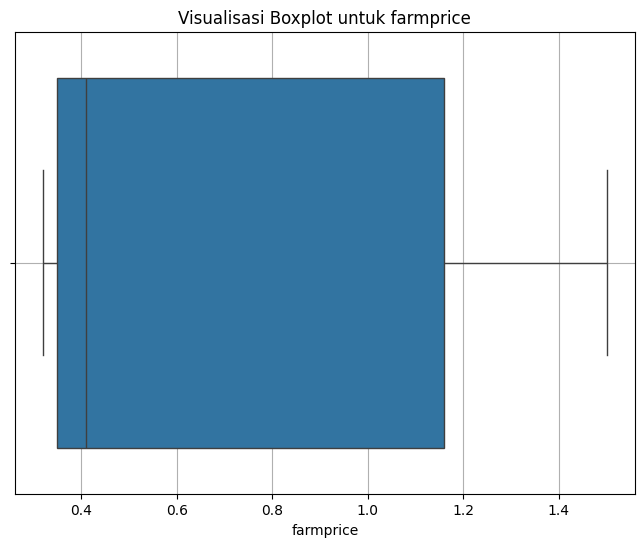

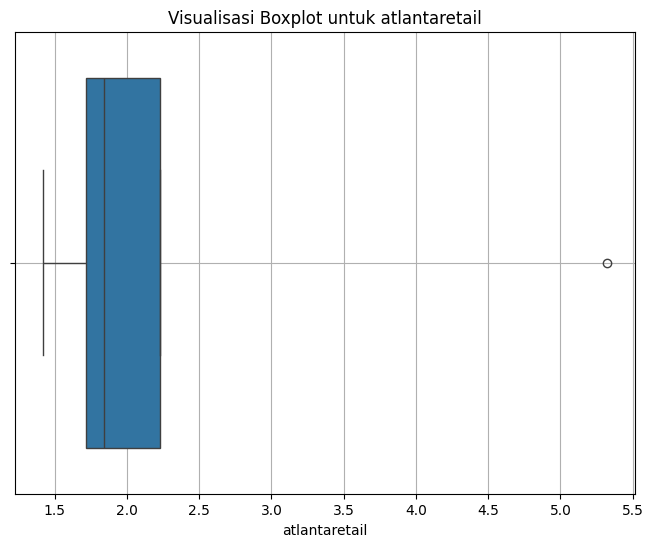

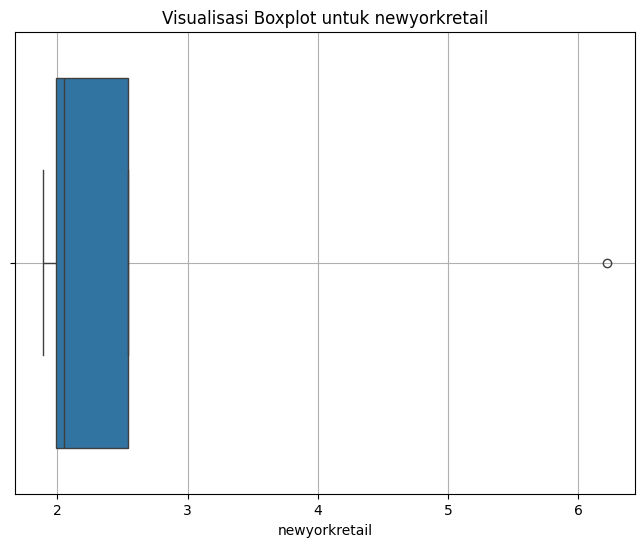

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Memeriksa outlier dengan boxplot
numeric_columns = df.select_dtypes(include=['number']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Visualisasi Boxplot untuk {col}')
    plt.xlabel(col)
    plt.grid(True)  # Menambahkan grid untuk membantu visualisasi
    plt.show()


In [29]:
# Mengecek nilai unik dari kolom Atlanta Retail
print(df['atlantaretail'].unique())


[2.23 1.72 1.84 5.32 1.42]


KATEGORISASI VARIABEL

In [30]:
print(df['productname'].unique())

print(df['farmprice'].max())

print(df['farmprice'].min())


['Strawberries' 'Romaine Lettuce' 'Red Leaf Lettuce' 'Potatoes' 'Oranges']
1.5
0.32


In [33]:
print(df.columns)


Index(['productname', 'farmprice', 'atlantaretail', 'newyorkretail',
       'is_organic', 'is_available', 'Atlanta Retail Category'],
      dtype='object')


In [37]:
def categorize_price(farm_price):
    if farm_price < 0.5:
        return 'Murah'
    elif 0.5 <= farm_price <= 1.5:
        return 'Sedang'
    else:
        return 'Mahal'

# Tambahkan kolom kategori berdasarkan farm price
df['category'] = df['farmprice'].apply(categorize_price)

# Menampilkan DataFrame dengan kategori baru
print(df[['productname', 'farmprice', 'category']])

        productname  farmprice category
0      Strawberries       1.16   Sedang
1   Romaine Lettuce       0.35    Murah
2  Red Leaf Lettuce       0.32    Murah
3          Potatoes       1.50   Sedang
4           Oranges       0.41    Murah
